## Visualize coverage around events

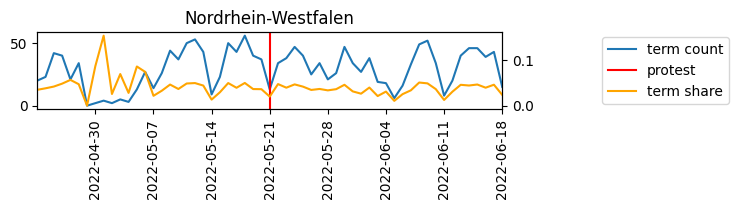

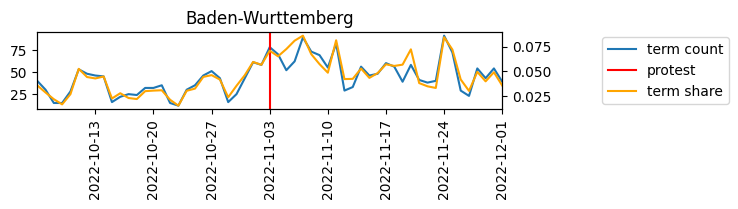

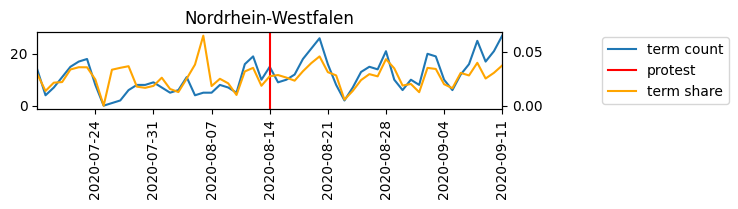

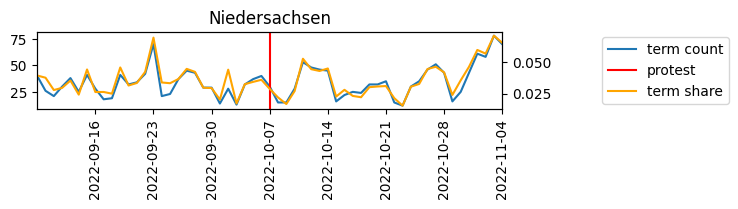

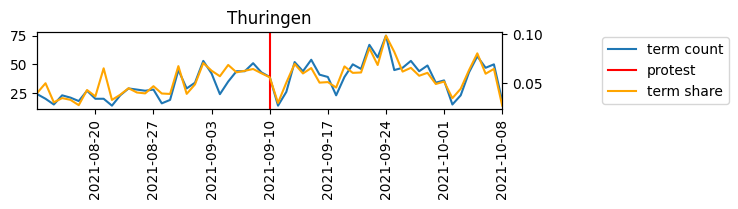

In [ ]:
from dateutil.relativedelta import relativedelta


def plot_protest(count_df, title=""):
    # visualize the term count and term share in the month before and after the protest
    # also visually indicate the protest date
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.plot(count_df.index, count_df["term_count"], label="term count")
    ax2 = ax.twinx()
    ax2.plot(count_df.index, count_df["term_share"], color="orange", label="term share")
    # add vertical line to indicate the protest date
    # protest date is in the center of the df
    protest_date = count_df.index[len(count_df) // 2]
    ax.axvline(protest_date, color="red", label="protest")
    # set x axis limits to the month before and after the protest
    ax.set_xlim(
        protest_date - relativedelta(days=7 * 4),
        protest_date + relativedelta(days=7 * 4),
    )
    # combined legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    # show legend next to plot with distance 1
    ax.legend(
        lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(1.2, 0.5)
    )
    # rotate x axis labels
    plt.setp(ax.get_xticklabels(), rotation=90)
    # make the xticks relative to the protest date
    ax.set_xticks([protest_date - relativedelta(days=7 * i) for i in range(-4, 4)])
    ax.set_title(title)
    plt.show()


for protest in climate_protests.sample(5, random_state=1).itertuples():
    protest_date = protest.event_date
    start_date = (protest_date - relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    end_date = (protest_date + relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    count_df = get_count("klima*", acled_region_to_mediacloud_region(region))
    count_df = count_df[start_date:end_date]
    if count_df is None:
        print("no data for", protest.admin1)
        continue
    plot_protest(count_df, protest.admin1)

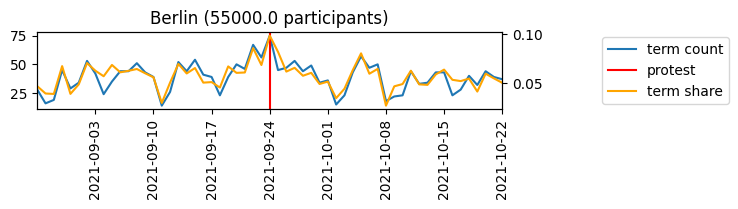

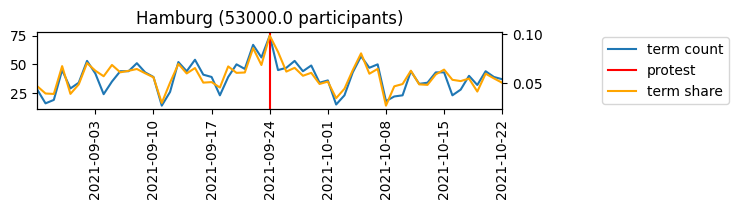

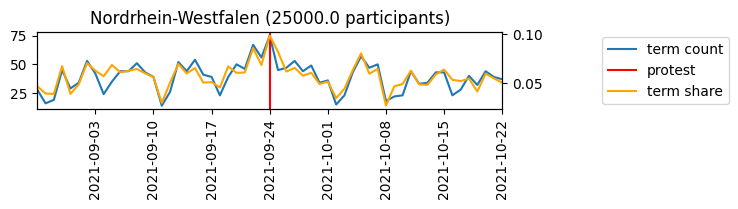

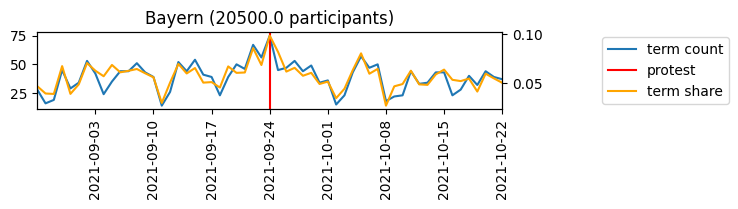

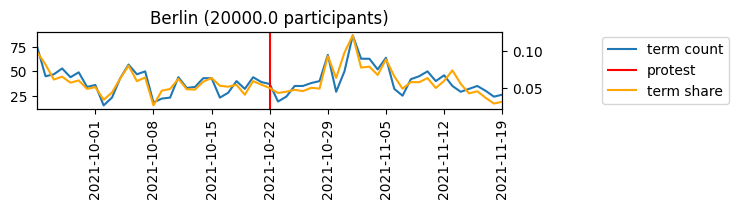

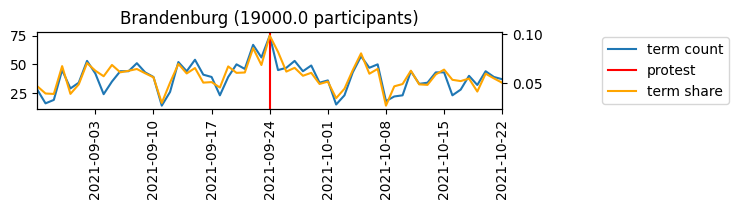

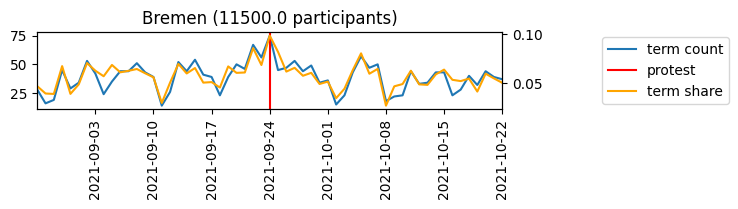

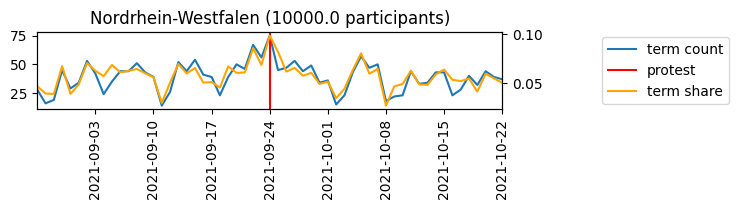

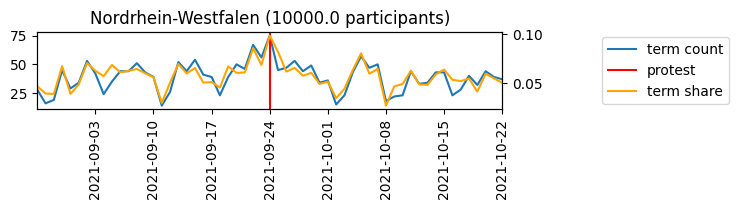

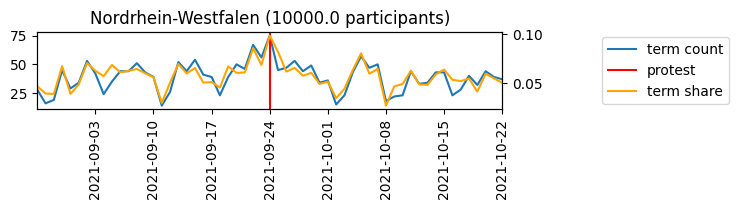

In [ ]:
# plot the 20 protests with the highest number of participants
for protest in (
    climate_protests.sort_values("size", ascending=False).head(10).itertuples()
):
    protest_date = protest.event_date
    start_date = (protest_date - relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    end_date = (protest_date + relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    count_df = get_count("klima*", acled_region_to_mediacloud_region(region))
    count_df = count_df[start_date:end_date]
    if count_df is None:
        print("no data for", protest.admin1)
        continue
    plot_protest(count_df, title=f"{protest.admin1} ({protest.size} participants)")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

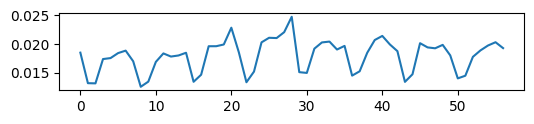

In [ ]:
count_dfs = []
for protest in climate_protests.sample(500, random_state=1).itertuples():
    protest_date = protest.event_date
    start_date = (protest_date - relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    end_date = (protest_date + relativedelta(days=7 * 4)).strftime("%Y-%m-%d")
    count_df = get_count("klima*", acled_region_to_mediacloud_region(region))
    count_df = count_df[start_date:end_date]
    # normalize date to the protest date
    count_df["day"] = (count_df.index - protest_date).astype("int64")
    # normalize term count
    count_df["term_count"] = count_df["term_count"] / count_df["term_count"].sum()
    count_df = count_df.reset_index(drop=True)
    count_dfs.append(count_df)
    # plot_protest_average(count_df, protest.admin1)

count_df = pd.concat(count_dfs)
count_df = count_df.groupby("day").mean().reset_index()

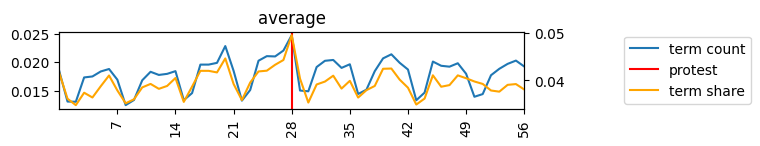

In [ ]:
def plot_protest_average(count_df, title=""):
    # visualize the term count and term share in the month before and after the protest
    # also visually indicate the protest date
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.plot(count_df.index, count_df["term_count"], label="term count")
    # ax.plot(count_df.index, count_df["overall_count"] / 100, label="overall count", color="green")
    ax2 = ax.twinx()
    ax2.plot(count_df.index, count_df["term_share"], label="term share", color="orange")
    # add vertical line to indicate the protest date
    # protest date is in the center of the df
    protest_date = 28
    ax.axvline(protest_date, color="red", label="protest")
    # set x axis limits to the month before and after the protest
    ax.set_xlim(protest_date - 7 * 4, protest_date + 7 * 4)
    # combined legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    # show legend next to plot with distance 1
    ax.legend(
        lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(1.2, 0.5)
    )
    # rotate x axis labels
    plt.setp(ax.get_xticklabels(), rotation=90)
    # make the xticks relative to the protest date
    ax.set_xticks([protest_date - 7 * i for i in range(-4, 4)])
    ax.set_title(title)
    plt.show()


plot_protest_average(count_df, title="average")

In [ ]:
df = get_count("sind", acled_region_to_mediacloud_region("Berlin"))
df.head()

,overall_count,term_count,term_share
2020-01-01,384,122,0.317708
2020-01-02,549,126,0.229508
2020-01-03,517,149,0.288201
2020-01-04,362,76,0.209945
2020-01-05,516,137,0.265504


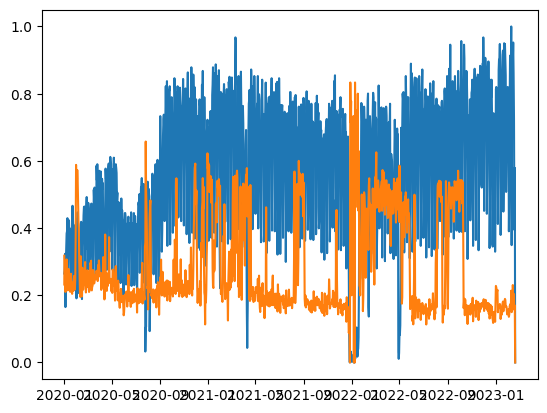

In [ ]:
plt.plot(df.index, df["term_count"] / df["term_count"].max())
plt.plot(df.index, df["term_share"])